## Face shape classificator

In [7]:
import keras
import numpy as np

class FaceSapeClassificator:
    def __init__(self) -> None:
        self.model = keras.saving.load_model("app_model/fine_tune_block6_aug.keras")
        self.class_names = ['heart', 'oblong', 'oval', 'round', 'square']


    def get_face_shape(self, batched_img):
        predicted_batch = self.model.predict(batched_img)
        predicted_id = np.argmax(predicted_batch, axis=1)

        return self.class_names[predicted_id[0]]

2024-06-05 13:43:35.307108: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 13:43:35.559656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 13:43:36.227185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Hair cut recommender

In [15]:
from mtcnn import MTCNN
import tensorflow as tf
import cv2
import json

class HairCutRecommender:
    def __init__(self) -> None:
        self.classificator = FaceSapeClassificator()
        self.recommendations = None
        self.load_recommendations()

    def load_recommendations(self):
        try:
            with open("recommendationPrompts.json") as stream:
                try:
                    self.recommendations = json.load(stream)
                    # print(self.recommendations)
                except ValueError:  # includes simplejson.decoder.JSONDecodeError
                    print('Decoding JSON has failed')
        except FileNotFoundError:
            print('This file does not exist, try again!')
        
    def preprocess_image(self, image, img_size = (150, 150)):
        # image = image.astype('float32')
        detector = MTCNN()
        min_conf = 0.9
        offset = 20
        new_batch = []

        h,w,ch = image.shape
        area = 0
        final_face = None
        detections = detector.detect_faces(image)

        # transform only face with the biggest area 
        for det in detections:
            if det['confidence'] >= min_conf:
                x, y, width, height = det['box']
                object = image[max(y-offset,0):min(y+height+offset,h), max(0,x-offset):min(w,x+width+offset), :]
                object_area = object.shape[0]*object.shape[1]
                if (object_area > area):
                    area = object_area
                    final_face = object
        final_face = cv2.resize(final_face, img_size)
        new_batch.append(final_face.astype(int))
        results_tensor = tf.stack(new_batch)
        # print(results_tensor.shape)
        return results_tensor
    
    def get_recommendations(self, face_shape):
        if self.recommendations is not None:
            return self.recommendations[face_shape]
        else:
            return face_shape

    def recommend(self, face_img):
        processed_face = self.preprocess_image(face_img)
        face_shape = self.classificator.get_face_shape(processed_face)
        return self.get_recommendations(face_shape)

In [16]:
recommender = HairCutRecommender()

## Load image

Square


(-0.5, 243.5, 311.5, -0.5)

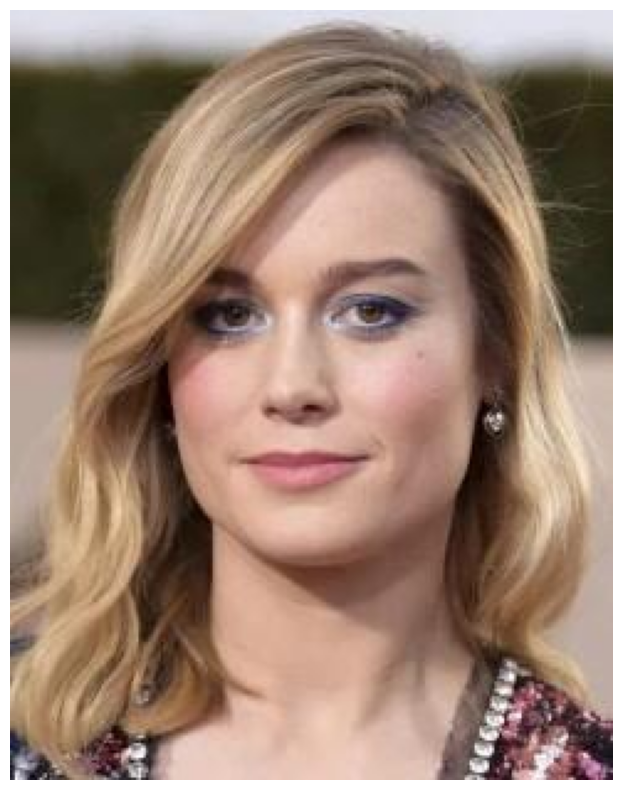

In [9]:
from glob import glob
from random import choice
import matplotlib.pyplot as plt

random_file = choice(glob(f'shapeofyou-2/test/**/*.jpg'))
print(random_file.split('/')[-2])
face_img = cv2.cvtColor(cv2.imread(random_file), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(face_img)
plt.axis('off')


In [17]:
recommender.recommend(face_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


{'bangs': ['wispy', 'side-swept'],
 'haircut': {'short': ['pixie-bob with side-swept chin-length bangs'],
  'medium': ['wavy shags with wispy fringe',
   'wavy shags with soft side-swept bangs'],
  'long': ['layered with fringe']},
 'does': ['Hairstyles that are fuller at the sides and that soften the corners are best'],
 'donts': ['Avoid enhancing the jawline further with blunt lines',
  'Strong fringe is not recommended either'],
 'faceShape': 'square'}

### Competition
Currently there are several products in development
that are similar to the envisioned product for this
project. However, not one of them is dominating the
market, so there is still room for competitors.

Face It [18] is an application that detects the shape of
person’s face. Hereafter, the user has to provide
personal information, such as occupation. Based on
these combined input features, a recommendation for
hairstyle, including facial hair, is given. This differs from
the envisioned product, because the user does not need
to provide any information other than a picture. This
increases the ease of use. However, Face It has some
additional features that could be added in later
development of the envisioned product, such as a list of
nearby hairdressers and recommended hair products.

The app Hair Color of ModiFace [14] focusses on hair
color change. It gives a real time visualization of a
different hair color mapped on a person’s hair through
live camera input. This could be interesting for
collaboration, since the product of this project does not
focus on hair color, but on hair style.

Both Dreambit [5] and FaceApp [7] have a functionality
to map different hairstyles on images of the user’s face.
This is not the area that is currently focused on, but the
technology would be interesting to apply in later
development.